<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/adamczyk/Systemy_rekomendacyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
dataset = pd.read_csv('GroceryStoreDataSet.csv', names=["products"])
dataset.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: 'GroceryStoreDataSet.csv'

In [ ]:
structured_dataset = dataset['products'].apply(lambda x: x.split(','))
structured_dataset.head()

In [ ]:
unique_items_set = set([item for sublist in structured_dataset for item in sublist])
sorted(unique_items_set)

In [ ]:
dataset['products'] = dataset['products'].str.replace('COCK', 'COKE').str.replace('SUGER', 'SUGAR')
structured_dataset = dataset['products'].apply(lambda x: x.split(','))
structured_dataset.head()

In [ ]:
transaction_encoder = TransactionEncoder()
encoded_dataset = transaction_encoder.fit(structured_dataset).transform(structured_dataset)
encoded_dataset = pd.DataFrame(encoded_dataset, columns=transaction_encoder.columns_).astype(int)
encoded_dataset

#Zadanie 1 - Grocery Store

In [ ]:
frequent_itemsets = apriori(encoded_dataset, min_support=0.15, use_colnames=True)
frequent_itemsets

##Para produktów o największej ufności reguły

##Para produktów o największym lift

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
max_confidence_rule = rules[rules['confidence'] == rules['confidence'].max()].head(1)
max_confidence_rule

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
max_lift_rule = rules[rules['lift'] == rules['lift'].max()].head(1)
max_lift_rule

# System Filmowy

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
print("Missing values in ratings:\n", ratings.isnull().sum())

Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print("Missing values in movies:\n", movies.isnull().sum())

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64


In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
print("Ratings: ", ratings['rating'].nunique(), sorted(ratings['rating'].unique()))
ratings['rating'].value_counts()

Ratings:  10 [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [9]:
print("Amount of ratings: ", ratings.shape[0])
print("Movies creted: ", movies['movieId'].nunique(),", Unique Titles", movies['title'].nunique())
print("Movies revied: ", movies['movieId'].nunique())
print("Amount of users: ", ratings['userId'].nunique(),", Highest Id", ratings['userId'].max())
print("Average amount of ratings per user: ", round(ratings.shape[0]/ratings['userId'].nunique(),2))
print("Average amount of ratings per movie: ", round(ratings.shape[0]/ratings['movieId'].nunique(),2))

Amount of ratings:  100836
Movies creted:  9742 , Unique Titles 9737
Movies revied:  9742
Amount of users:  610 , Highest Id 610
Average amount of ratings per user:  165.3
Average amount of ratings per movie:  10.37


In [10]:
titles = list(movies['title'])
duplicates = set([x for x in titles if titles.count(x) > 1])

print("Zduplikowane tytuły filmów:")
for duplicate in duplicates:
  print("  -",duplicate)

movies[movies['title'].isin(duplicates)]

Zduplikowane tytuły filmów:
  - Eros (2004)
  - Emma (1996)
  - Saturn 3 (1980)
  - Confessions of a Dangerous Mind (2002)
  - War of the Worlds (2005)


,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [11]:
movie_titles_dict = dict(zip(movies['movieId'], movies['title']))
##movie_titles

In [12]:
#C represents the average rating
#m represents the average rating of all movies

C = ratings.shape[0]/ratings['movieId'].nunique()
m = ratings['rating'].sum()/ratings.shape[0]
print("C: ",C, ", m: ",m)

C:  10.369806663924312 , m:  3.501556983616962


In [13]:
def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum()) / (C + ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = pd.merge(movies, bayesian_avg_ratings, on='movieId')

print(movie_stats.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  bayesian_avg  
0  Adventure|Animation|Children|Comedy|Fantasy      3.901634  
1                   Adventure|Children|Fantasy      3.437826  
2                               Comedy|Romance      3.299841  
3                         Comedy|Drama|Romance      3.040360  
4                                       Comedy      3.146557  


In [14]:
from scipy.sparse import csr_matrix
def create_sparse(df):
  M = df['userId'].nunique()
  N = df['movieId'].nunique()
  user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
  movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
  user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
  movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
  user_index = [user_mapper[i] for i in df['userId']]
  item_index = [movie_mapper[i] for i in df['movieId']]
  X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M,N))
  return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

In [15]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_sparse(ratings)

In [16]:
def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbour_ids = []
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids


In [17]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz #scipy.sparse.csr_matrix.nnz no of stored values, including explicit 0
sparsity = n_ratings/n_total
sparsity_p = round(sparsity*100,2)
print(f"Matrix sparsity: {sparsity_p}%")
n_ratings_per_user = X.getnnz(axis=1)

Matrix sparsity: 1.7%


In [18]:
n_ratings_per_user = X.getnnz(axis=1)
print("Amount of ratings per user:", n_ratings_per_user)

Amount of ratings per user: [ 232   29   39  216   44  314  152   47   46  140   64   32   31   48
  135   98  105  502  703  242  443  119  121  110   26   21  135  570
   81   34   50  102  156   86   23   60   21   78  100  103  217  440
  114   48  399   42  140   33   21  310  359  130   20   33   25   46
  476  112  107   22   39  366  271  517   34  345   36 1260   46   62
   35   45  210  177   69  119   29   61   64  167   26  227  118  293
   34   70   21   56  518   54  575   24   97   56  168   78   36   92
   53  148   61   56  377  273  722   33   34   76  127   51  646   65
  150   31  112   87  165   22  215   22   58  292   56   50  360   38
   22   33  140   28   69  347   35   35  279  111  141   22  194  608
  168   38   71  128   23   32   20   48   58   26   59   63  179   34
   46  398   21   26   97  437   39   38   23   36   65  190  173   94
  269   50   82   26   25   67   24   36  904   77   69   24  118  977
   57  134   47  226  258   48   20   66   85   2

In [19]:
toy_story_id = movies[movies['title'].str.contains('Toy Story \(')]['movieId'][0]
similar_movies = find_similar_movies(toy_story_id, X, movie_mapper, movie_inv_mapper, k=10, metric='cosine')
print(f"Most similar movies (Id):  {toy_story_id}: {similar_movies}")
print(f"\nMost similar movies (Title):  {list(movies[movies['movieId']==toy_story_id]['title'])}:")
movies[movies['movieId'].isin(similar_movies)]['title']


Most similar movies (Id):  1: [3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

Most similar movies (Title):  ['Toy Story (1995)']:


224             Star Wars: Episode IV - A New Hope (1977)
314                                   Forrest Gump (1994)
322                                 Lion King, The (1994)
418                                  Jurassic Park (1993)
546                            Mission: Impossible (1996)
615                  Independence Day (a.k.a. ID4) (1996)
911     Star Wars: Episode VI - Return of the Jedi (1983)
964                                  Groundhog Day (1993)
2355                                   Toy Story 2 (1999)
Name: title, dtype: object

In [20]:
toy_story_id = movies[movies['title'].str.contains('Toy Story \(')]['movieId'][0]
toy_story_id

1

In [21]:
movies['genres'] = movies['genres'].str.lower()
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

In [22]:
genre_lists = list(movies['genres'].apply(lambda x: x.lower().split('|')))
genre_list = []

for genres in genre_lists:
  genre_list.extend(genres)

print("Set of unique genres (lowercase):", set(genre_list))
genre_df = pd.DataFrame(genre_list)
genre_df.value_counts()

Set of unique genres (lowercase): {'thriller', 'documentary', 'drama', 'children', 'adventure', 'fantasy', 'mystery', 'crime', 'romance', 'war', 'film-noir', 'imax', 'action', 'horror', '(no genres listed)', 'animation', 'sci-fi', 'comedy', 'western', 'musical'}


drama                 4361
comedy                3756
thriller              1894
action                1828
romance               1596
adventure             1263
crime                 1199
sci-fi                 980
horror                 978
fantasy                779
children               664
animation              611
mystery                573
documentary            440
war                    382
musical                334
western                167
imax                   158
film-noir               87
(no genres listed)      34
Name: count, dtype: int64

In [23]:
children_movies_count = movies[movies['genres'].str.contains('children')].shape[0]
print("Liczba filmów dla dzieci:", children_movies_count)

Liczba filmów dla dzieci: 664


In [24]:
from datetime import datetime

ratings['rating_year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year

## Przegląd danych:

1.Podaj liczbę filmów dla dzieci

2.Pokaż rozkład ocen filmów z 1995

3.Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane

Rozkład ocen filmów z 1995 roku:
rating
0.5      50
1.0     254
1.5      75
2.0     522
2.5     244
3.0    1701
3.5     467
4.0    1625
4.5     308
5.0     898
Name: count, dtype: int64


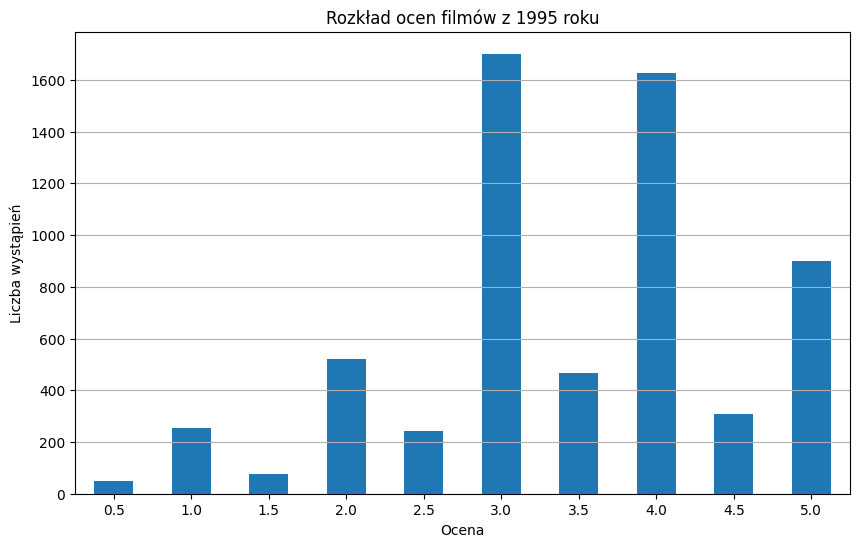

In [25]:
import matplotlib.pyplot as plt
ratings_join = ratings.merge(movies, on='movieId', how='inner')
ratings_1995 = ratings_join[ratings_join['year'] == '1995']
ratings_distribution_1995 = ratings_1995['rating'].value_counts().sort_index()
print("Rozkład ocen filmów z 1995 roku:")
print(ratings_distribution_1995)
plt.figure(figsize=(10, 6))
ratings_distribution_1995.plot(kind='bar')
plt.title('Rozkład ocen filmów z 1995 roku')
plt.xlabel('Ocena')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Wyświetlenie wykresu
plt.show()

In [26]:
ratings_join

,userId,movieId,rating,timestamp,rating_year,title,genres,year
0,1,1,4.0,964982703,2000,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
1,5,1,4.0,847434962,1996,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
2,7,1,4.5,1106635946,2005,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
3,15,1,2.5,1510577970,2017,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
4,17,1,4.5,1305696483,2011,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,2016,Bloodmoon (1997),action|thriller,1997
100832,610,160527,4.5,1479544998,2016,Sympathy for the Underdog (1971),action|crime|drama,1971
100833,610,160836,3.0,1493844794,2017,Hazard (2005),action|drama|thriller,2005
100834,610,163937,3.5,1493848789,2017,Blair Witch (2016),horror|thriller,2016


In [27]:
action_movies = ratings_join[ratings_join['genres'].str.contains('action', case=False)]

average_rating_action = action_movies['rating'].mean()
print(f"Średnia ocen filmów akcji: {average_rating_action}")

print("\nTrzy najwyżej oceniane filmy akcji:")
action_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)



Średnia ocen filmów akcji: 3.447984331646809

Trzy najwyżej oceniane filmy akcji:
title
Knock Off (1998)                                                      5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012)    5.0
Sonatine (Sonachine) (1993)                                           5.0
Name: rating, dtype: float64


# SUPRISE

Zbuduj system rekomendacyjny używając biblioteki SURPRISE
• Użyj dwóch algorytmów SVD oraz kNN w wersji wylosowanej
• Użyj optymalizacji parametrów metodą GRID search do wyboru liczby sąsiadów z wylosowanego przedziału
• Użyj walidacji krzyżowej dla ostatecznego modelu
• Porównaj oba algorytmy pod względem czasu uczenia oraz wylosowanych błędów

In [28]:
!pip install surprise
# importing relevant libraries
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357257 sha256=ea1aabcf47d5370d5d8f824589bdfe96828f85ec869852062587c1fa27ab4070
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId','movieId' , 'rating']], reader)
trainset, testset = train_test_split(data, test_size = 0.25)

## SVD

In [49]:
start_time_svd_train = time.time()
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
end_time_svd_train = time.time()


RMSE: 0.8794


In [47]:
param_grid = {
    'n_factors': [1,2,5,10, 50]
}

# Perform cross-validation and measure time for SVD
start_time_svd = time.time()

gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs_svd.fit(data)
end_time_svd = time.time()

In [50]:
gs_svd.best_params

{'rmse': {'n_factors': 5}}

In [31]:
cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8727  0.8669  0.8794  0.8745  0.8732  0.8734  0.0040  
MAE (testset)     0.6707  0.6665  0.6771  0.6735  0.6699  0.6716  0.0036  
Fit time          3.55    2.27    1.90    1.62    1.62    2.19    0.72    
Test time         0.26    0.55    0.13    0.12    0.36    0.29    0.16    


{'test_rmse': array([0.87267835, 0.86693267, 0.87944695, 0.8745297 , 0.87320773]),
 'test_mae': array([0.6707043 , 0.66648557, 0.67712703, 0.67351844, 0.66993747]),
 'fit_time': (3.5529208183288574,
  2.271451711654663,
  1.9041557312011719,
  1.6157386302947998,
  1.6245956420898438),
 'test_time': (0.2645094394683838,
  0.5505990982055664,
  0.12670683860778809,
  0.12247300148010254,
  0.3623642921447754)}

## KNNBasic

In [51]:
lgo = KNNBasic()
start_time_knn_train = time.time()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
end_time_knn_train = time.time()


RMSE: 0.8820


In [46]:
param_grid = {
    'k': [1, 2, 5, 10, 20, 30, 40, 50]
}
start_time_knn = time.time()

gs_knn = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs_knn.fit(data)
end_time_knn = time.time()

In [52]:
gs_knn.best_params

{'rmse': {'k': 10}}

In [38]:
cross_validate(KNNBasic(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9478  0.9440  0.9487  0.9510  0.9433  0.9470  0.0029  
MAE (testset)     0.7286  0.7243  0.7272  0.7260  0.7218  0.7256  0.0024  
Fit time          0.18    0.17    0.17    0.17    0.15    0.17    0.01    
Test time         1.55    1.79    1.40    1.41    1.73    1.58    0.16    


{'test_rmse': array([0.94784127, 0.94401981, 0.94865271, 0.95098418, 0.94327581]),
 'test_mae': array([0.72855351, 0.72429042, 0.72720553, 0.72598938, 0.72178699]),
 'fit_time': (0.1832113265991211,
  0.16990113258361816,
  0.16859650611877441,
  0.17180776596069336,
  0.1510450839996338),
 'test_time': (1.547698736190796,
  1.794741153717041,
  1.4040424823760986,
  1.411341667175293,
  1.7291738986968994)}

## KNNBaseline

In [37]:
algo = KNNBaseline()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8804


0.8803519233190453



```
# This is formatted as code
```

## PoownaniePoownanierr

In [54]:
import time
# Extract best models
best_knn = gs_knn.best_estimator['rmse']
best_svd = gs_svd.best_estimator['rmse']

# Perform cross-validation and measure time for kNN
start_time_knn_cross = time.time()
cv_results_knn = cross_validate(best_knn, data, measures=['rmse'], cv=5, verbose=True)
end_time_knn_cross = time.time()

# Perform cross-validation and measure time for SVD
start_time_svd_cross = time.time()
cv_results_svd = cross_validate(best_svd, data, measures=['rmse'], cv=5, verbose=True)
end_time_svd_cross = time.time()

# Print results
print(f"\nBest KNN RMSE: {gs_knn.best_score['rmse']}")
print(f"Best SVD RMSE: {gs_svd.best_score['rmse']}")
print(f"\nBest KNN Parameters: {gs_knn.best_params['rmse']}")
print(f"Best SVD Parameters: {gs_svd.best_params['rmse']}")
print(f"\nHyperparameters KNN Training Time: {end_time_knn - start_time_knn} seconds")
print(f"Hyperparameters SVD Training Time: {end_time_svd - start_time_svd} seconds")
print(f"\nCros KNN Training Time: {end_time_knn - start_time_knn} seconds")
print(f"Cros SVD Training Time: {end_time_svd_cross - start_time_svd_cross} seconds")
print(f"\nTrain SVD Training Time: {end_time_svd_train - start_time_svd_train} seconds")
print(f"Train KNN Training Time: {end_time_knn_train - start_time_knn_train} seconds")
print(f"\nKNN Cross-validation Results: {cv_results_knn}")
print(f"SVD Cross-validation Results: {cv_results_svd}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9361  0.9423  0.9365  0.9420  0.9469  0.9407  0.0040  
Fit time          0.28    0.23    0.18    0.16    0.17    0.20    0.05    
Test time         3.29    1.39    1.17    1.15    1.61    1.72    0.80    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8644  0.8619  0.8715  0.8747  0.8761  0.8697  0.0056  
Fit time          0.79    0.75    0.90    2.86    1.36    1.33    0.79    
Test ti